# Example of light sources

## Creating an instance

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.

In [1]:
%matplotlib inline

In [2]:
from diffractio import degrees, mm, np, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY

number of processors: 8


In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=[5,5]
rcParams['figure.dpi']=75

## Procedures to convert a scalar source into a vector source

When a light source is defined using Scalar_source_XY, it can be converted to vectorial using several functions with vector characteristics of the source:

* constant_wave
* radial_wave
* transversal_wave
* radial_inverse_wave
* transversal_inverse_wave
* local_polarized_vector_wave
* local_polarized_vector_wave_radial
* local_polarized_vector_wave_hybrid
* spiral_polarized_beam

When the field *u* in the function is a float number, then it is considered as the amplitude of the wave. Also this functions are masked, with a circular mask, radius=($r_x$, $r_y$), when $r_x$ and $r_y$ >0.

When the parameter results u=1, then the intensity distribution is 1 in both $E_x$ and $E_y$ fields.

### constant polarization wave

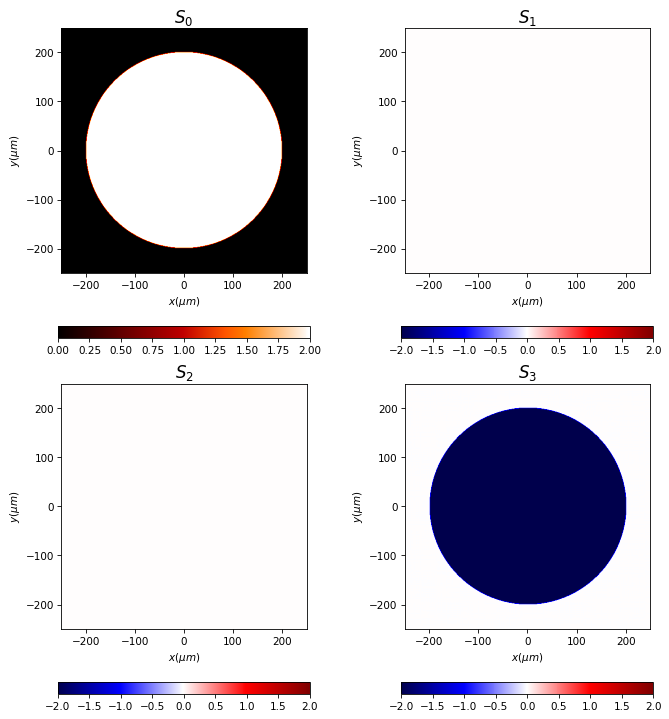

In [4]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.constant_wave(u=1,v=(1,1j), radius=(200,200))
EM.draw('stokes');

### radial wave

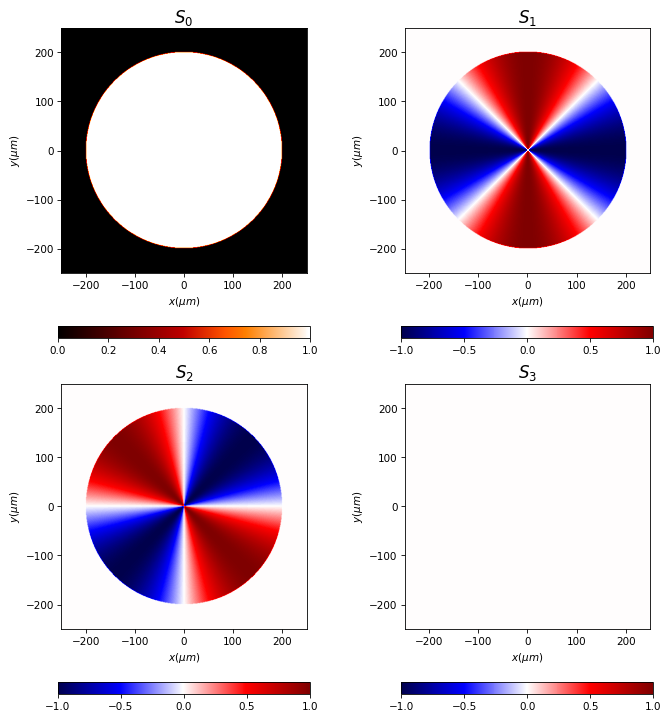

In [5]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.radial_wave(u=1, r0=(0,0), radius=(200,200))
EM.draw('stokes');

### transversal wave

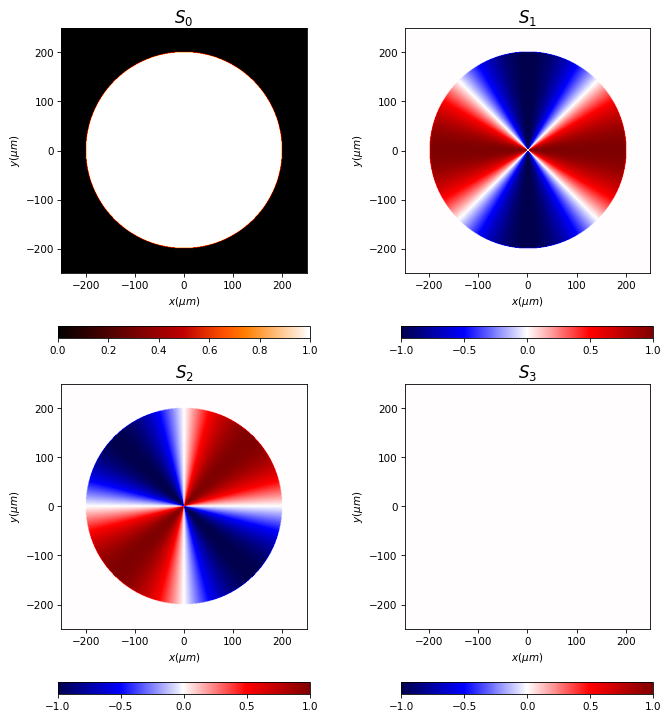

In [6]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.transversal_wave(u=1, r0=(0,0), radius=(200,200))
EM.draw('stokes');

### radial inverse wave

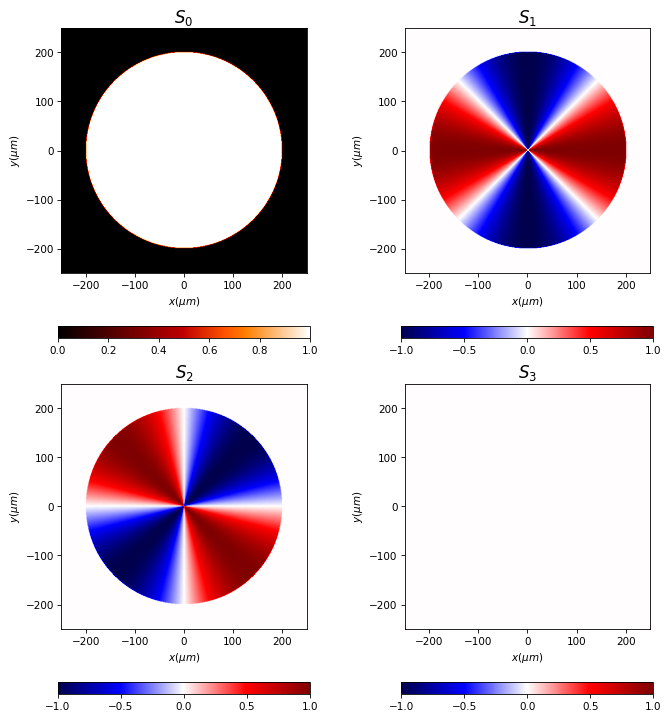

In [7]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.radial_inverse_wave(u=1, r0=(0,0), radius=(200,200))
EM.draw('stokes');

### transversal inverse wave

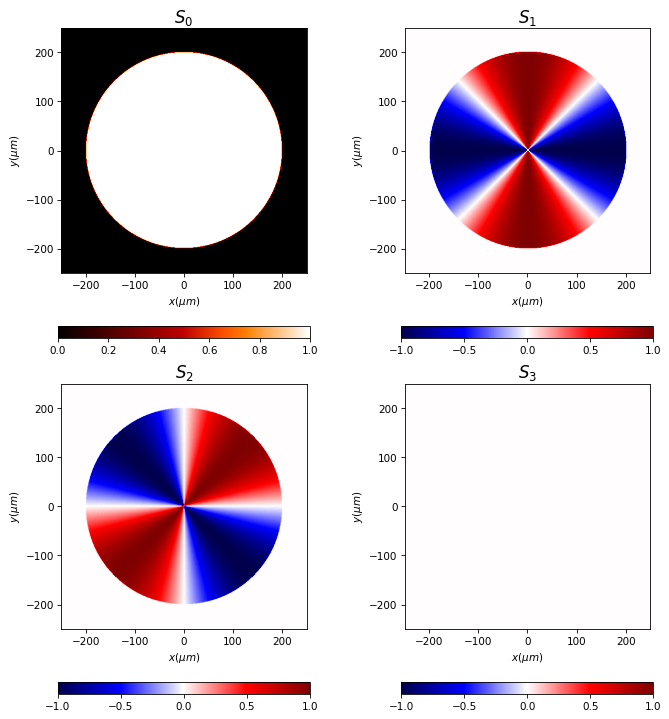

In [8]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.transversal_inverse_wave(u=1, r0=(0,0), radius=(200,200))
EM.draw('stokes');

### local polarized vector wave

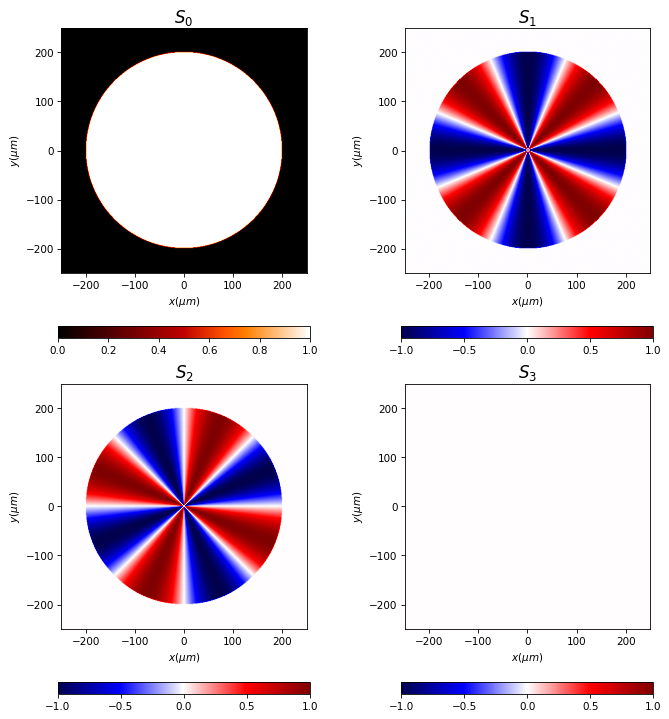

In [9]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.local_polarized_vector_wave(u=1,m=2, fi0=np.pi/2, r0=(0,0), radius=(200,200))
EM.draw('stokes');


### local polarized vector radial beam

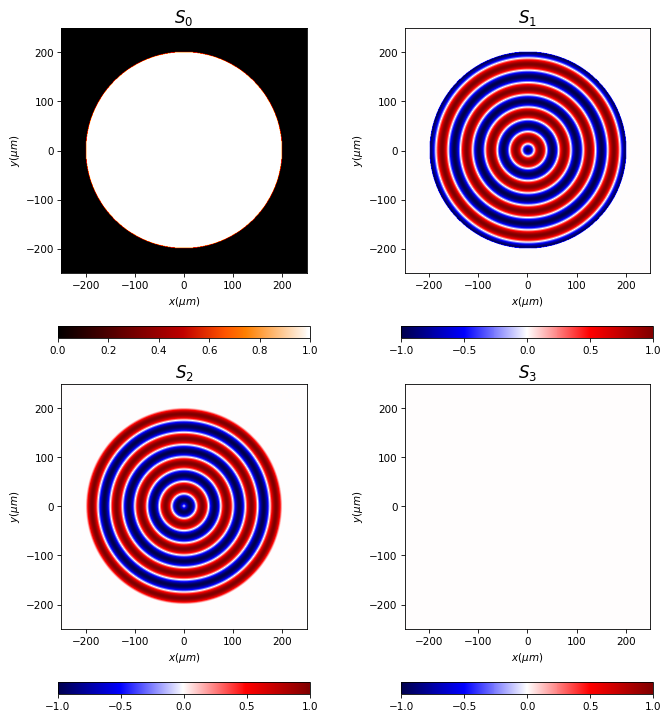

In [10]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.local_polarized_vector_wave_radial(u=1,m=2, fi0=np.pi/2, r0=(0,0), radius=(200,200))
EM.draw('stokes');

### local polareized vector hybrid beam

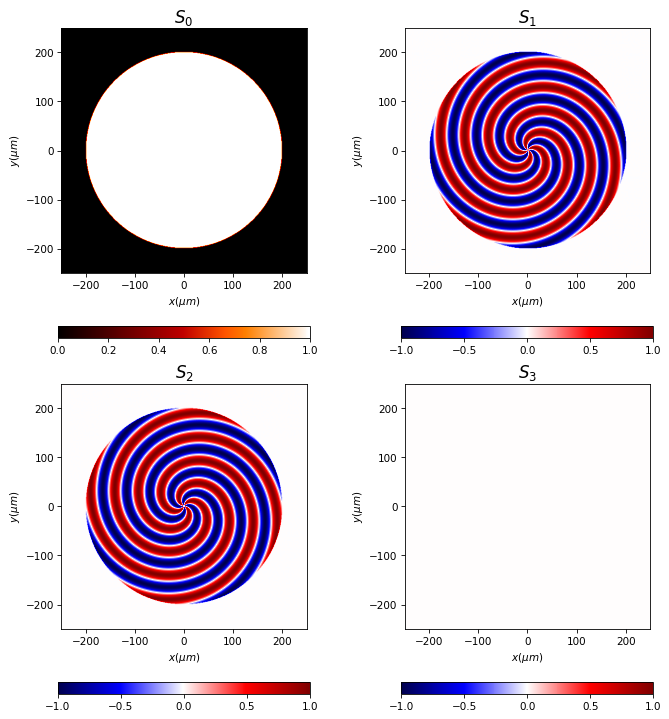

In [11]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.local_polarized_vector_wave_hybrid(u=1,n=2, m=2, fi0=np.pi/2, r0=(0,0), radius=(200,200))
EM.draw('stokes');

### spiral polarized beam

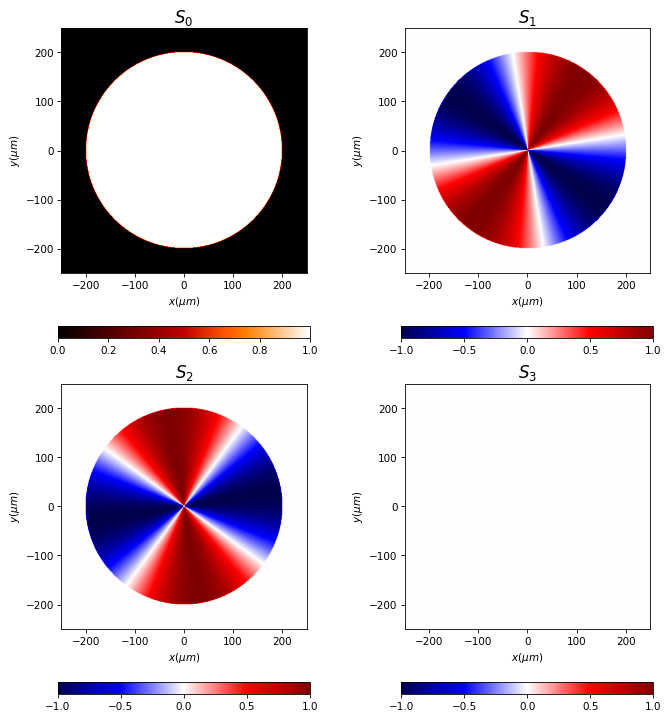

In [12]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.spiral_polarized_beam(u=1,r0=(0,0), alpha=np.pi/5, radius=(200,200))
EM.draw('stokes');

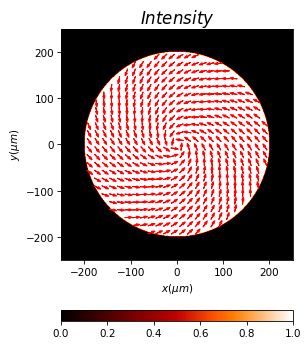

In [13]:
EM.__draw_ellipses__(
    num_ellipses=(30, 30),
    amplification=0.5,
    color_line='r',
    line_width=1,
    draw_arrow=True,
    head_width=5,
    ax=False)

## Generation of a structured beam with polarization
The same functions used previously, can be used to generate vector fields with spatial intensity distribution. In this case, the u parameter is a Scalar_source_XY.

Here, let us see the Gauss beam example.

In [14]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

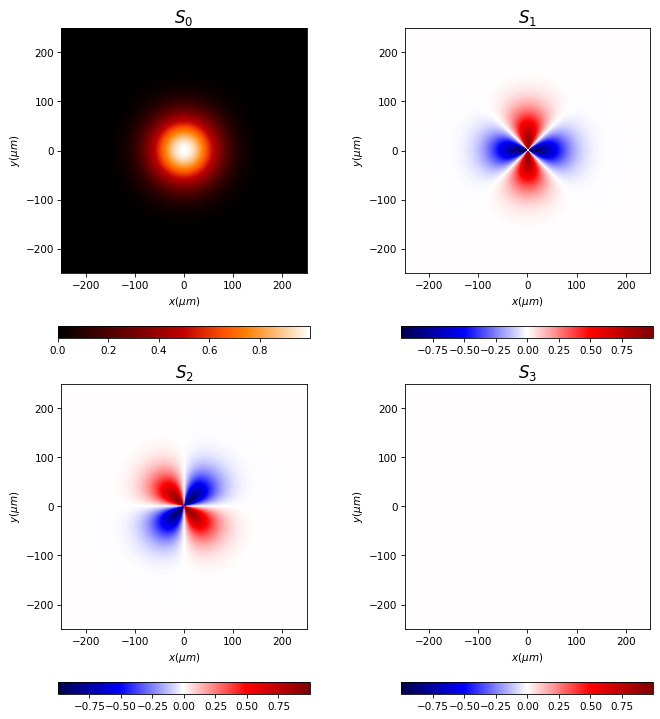

In [15]:
EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.radial_wave(u=u0, r0=(0,0), radius=(200,200))
EM.draw('stokes');

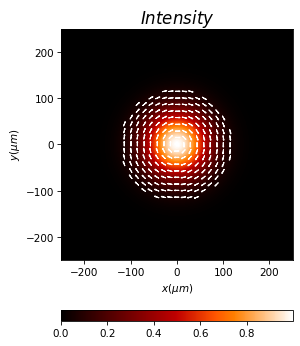

In [16]:
EM.draw('ellipses', num_ellipses=(35,35))

## Vector wave from a scalar source

All these methods to provide vector polarization  to a constant wave, can be used for any other scalar source. Then we include in the $u$ parameters the scalar field:



In [17]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1, theta=90 * degrees, phi=1 * degrees)

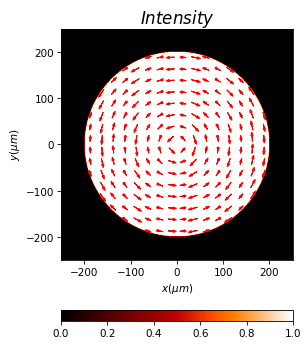

In [18]:
EM=Vector_paraxial_source_XY(x0,y0,wavelength)
EM.radial_wave(u=u0, r0=(0,0), radius=(200,200))
EM.__draw_ellipses__(
    num_ellipses=(20,20),
    amplification=0.5,
    color_line='r',
    line_width=1,
    draw_arrow=True,
    head_width=5)

This can also been done, for example to a Gauss beam:

In [19]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.vortex_beam(r0=(0,0), w0=100*um,m=3)

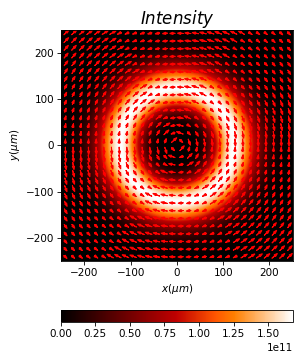

In [20]:
EM=Vector_paraxial_source_XY(x0,y0,wavelength)
EM.radial_wave(u0, r0=(0,0))
EM.__draw_ellipses__(
    num_ellipses=(30,30),
    amplification=0.5,
    color_line='r',
    line_width=1,
    draw_arrow=True,
    head_width=5)

## Gauss Polarization
Since Gauss beams are very used, we have defined the main polarization classes for these beams

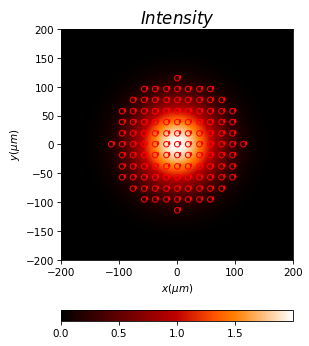

In [21]:

x0 = np.linspace(-200*um, 200*um, 512)
y0 = np.linspace(-200*um, 200*um, 512)
wavelength = 0.6328 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    theta=0. * degrees,
    phi=0 * degrees)



EM = Vector_paraxial_source_XY(x0, y0, wavelength)
EM.constant_wave(u1,v=(1,1j))
EM.__draw_ellipses__(
    num_ellipses=(21, 21),
    amplification=0.5,
    color_line='r',
    line_width=1,
    draw_arrow=True,
    head_width=3)

## interferences

Vector fields also interfere. We can sum two vector beams using $E_M = E_{M1} + E_{M2}$


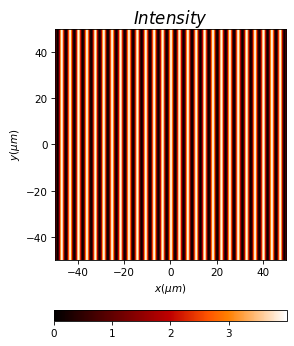

In [22]:
length = 100 * um
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328

u1=Scalar_source_XY(x0,y0,wavelength)
u1.plane_wave(A=1, theta=90*degrees, phi=5*degrees)

u2=Scalar_source_XY(x0,y0,wavelength)
u2.plane_wave(A=1, theta=90*degrees, phi=-5*degrees)

EM1 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=[1, 0])

EM2 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM2.constant_wave(u=u2, v=[1, 0])

EM = EM1 + EM2
EM.draw(kind='intensity');

Obviously, when the two beams are ortogonal, no interference is produced:

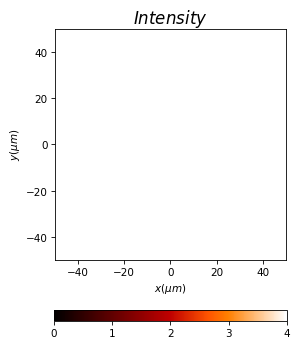

In [23]:
length = 100 * um
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328

u1=Scalar_source_XY(x0,y0,wavelength)
u1.plane_wave(A=1, theta=90*degrees, phi=5*degrees)

u2=Scalar_source_XY(x0,y0,wavelength)
u2.plane_wave(A=1, theta=90*degrees, phi=-5*degrees)

EM1 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=[1, 1j])

EM2 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM2.constant_wave(u=u2, v=[1, -1j])

EM = EM1 + EM2
EM.draw(kind='intensity');